https://www.kaggle.com/datasets/maximebonnin/dnd-characters-test

In [1]:
import pandas as pd
import random
arquivo = pd.read_csv(r"C:\Users\Lucas\Downloads\archive\over_one_mil_chars.csv",encoding='utf-8')
arquivo

,Unnamed: 0,char_id,name,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,...,class_starting_level,subclass_starting,class_other,subclass_other,total_level,feats,inventory,date_modified,notes_len,gold
0,0,1,Molster,8,11,22,11,17,20,12,...,4,NaN,NaN,NaN,4,NaN,Adamantine Chain Shirt/Cloak of Protection/Gog...,2022-09-12T19:13:03.29Z,17,305.00
1,1,3,Prailak,103,12,17,18,14,16,16,...,20,The Great Old One,NaN,NaN,20,"Spell Sniper (Bard, Sorcerer, Warlock)/Inferna...","Bag of Holding/Iron Flask/Studded Leather, +3/...",2021-12-07T21:25:36.9Z,60,0.00
2,2,8,Aurilanax,76,18,10,16,13,13,16,...,7,Oath of the Crown,NaN,NaN,7,NaN,Shield,2021-01-21T16:50:35Z,0,0.00
3,3,10,Gamndell Banglebon,127,10,14,16,16,15,18,...,2,NaN,Bard/Cleric/Wizard,School of Illusion,16,NaN,Give/Studded Leather/Dagger/Light Hammer/Ink (...,2020-08-06T16:05:07Z,65,4951.06
4,4,19,Bellek Bouncer,52,10,10,15,12,14,10,...,6,Life Domain,NaN,NaN,6,NaN,Shield/Plate/Mace/Potion of Healing,2020-05-15T04:47:59Z,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204247,1204247,1356287,Ronan,19,13,13,15,11,12,9,...,2,NaN,NaN,NaN,2,NaN,"Javelin/Crossbow, light/Greataxe/Backpack/Back...",2018-06-29T15:37:47Z,89,15.00
1204248,1204248,1356288,Dazzling Dumein,53,8,13,15,12,10,14,...,10,College of Lore,NaN,NaN,10,NaN,Mantle of Spell Resistance/Rod of Lordly Might...,2022-02-26T20:00:59.77Z,313,7125.35
1204249,1204249,1356298,Asteroidj's Character,0,13,13,13,13,12,11,...,1,NaN,NaN,NaN,1,NaN,Boots of Elvenkind/Boots of Striding and Sprin...,2018-06-29T15:37:47Z,18,10.00
1204250,1204250,1356299,Elara Neris,20,12,18,16,17,13,8,...,5,Bladesinging,NaN,NaN,5,War Caster,Ring of Free Action/Ring of Spell Storing/Wing...,2018-06-29T15:37:47Z,43,110.00


In [3]:
import pandas as pd
import random
#df = arquivo.read_csv(r"C:\Users\Lucas\Downloads\pjs_dndbeyond_filtrados.csv")
X=arquivo.drop(['Unnamed: 0',
           'char_id',
           'name',
           'subclass_starting',
           'class_other',
           'inventory',
           'gold',
           'background',
           'date_modified',
           'subclass_starting',
           'class_other',
           'feats',
           'notes_len',
           'class_starting_level',
           'subclass_other'],axis=1)
contagem_racas = X['race'].value_counts()

# Defina a frequência mínima
limiar_frequencia = 44700

# Filtrando raças
racas_comuns = contagem_racas[contagem_racas > limiar_frequencia].index

# Filtrando o DataFrame original
df_filtrado = X[X['race'].isin(racas_comuns)]
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado

,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,race,class_starting,total_level
0,103,12,17,18,14,16,16,Tiefling,Warlock,20
1,127,10,14,16,16,15,18,Gnome,Warlock,16
2,52,10,10,15,12,14,10,Half-Orc,Cleric,6
3,62,8,14,13,17,12,15,Elf,Wizard,15
4,58,12,15,15,13,15,16,Human,Sorcerer,14
...,...,...,...,...,...,...,...,...,...,...
1045343,19,13,13,15,11,12,9,Half-Orc,Barbarian,2
1045344,53,8,13,15,12,10,14,Half-Elf,Bard,10
1045345,0,13,13,13,13,12,11,Human,Rogue,1
1045346,20,12,18,16,17,13,8,Elf,Wizard,5


In [5]:
novo_nome_colunas = {
    'base_hp': 'hp',
    'stats_1':'Str',
    'stats_2':'Dex',
    'stats_3':'Con',
    'stats_4':'Int',
    'stats_5':'Wis',
    'stats_6':'Cha',
    'class_starting':'class',
    'total_level':'lvl'}

df = df_filtrado.rename(columns=novo_nome_colunas)
df

,hp,Str,Dex,Con,Int,Wis,Cha,race,class,lvl
0,103,12,17,18,14,16,16,Tiefling,Warlock,20
1,127,10,14,16,16,15,18,Gnome,Warlock,16
2,52,10,10,15,12,14,10,Half-Orc,Cleric,6
3,62,8,14,13,17,12,15,Elf,Wizard,15
4,58,12,15,15,13,15,16,Human,Sorcerer,14
...,...,...,...,...,...,...,...,...,...,...
1045343,19,13,13,15,11,12,9,Half-Orc,Barbarian,2
1045344,53,8,13,15,12,10,14,Half-Elf,Bard,10
1045345,0,13,13,13,13,12,11,Human,Rogue,1
1045346,20,12,18,16,17,13,8,Elf,Wizard,5


In [7]:
def dados_fisicos(df):
    df['Pes'] = pd.Series(dtype='float64')
    df['Alt'] = pd.Series(dtype='float64')
    df['Desl'] = pd.Series(dtype='float64')
    df['T_vida'] = pd.Series(dtype='float64')
    for index, row in df.iterrows():  
        if  row['race']=='Human':
            df.at[index, 'Pes'] = [random.uniform(45, 115)]
            df.at[index, 'Alt'] = [random.uniform(1.5, 1.95)]
            df.at[index, 'Desl']=9.0
            df.at[index, 'T_vida']= [random.uniform(40,100)]
        if  row['race']==('Half-Elf'):
            df.at[index, 'Pes'] = [random.uniform(45, 115)]
            df.at[index, 'Alt'] = [random.uniform(1.5, 1.95)]
            df.at[index, 'Desl']=9.0
            df.at[index, 'T_vida']= [random.uniform(150,210)]
        if  row['race']==('Dwarf'):
            df.at[index, 'Pes'] = [random.uniform(50, 100)]
            df.at[index, 'Alt'] = [random.uniform(1.35, 1.65)]
            df.at[index, 'Desl']=7.5
            df.at[index, 'T_vida']= [random.uniform(330,380)] 
        if row['race']==('Elf'):
            df.at[index, 'Pes'] = [random.uniform(50, 100)]
            df.at[index, 'Alt'] = [random.uniform(1.65, 2.1)]
            df.at[index, 'Desl']=9
            df.at[index, 'T_vida']= [random.uniform(720,750)] 
        if  row['race']==('Tiefling'):
            df.at[index, 'Pes'] = [random.uniform(45, 115)]
            df.at[index, 'Alt'] = [random.uniform(1.5, 1.95)]
            df.at[index, 'Desl']=9.0
            df.at[index, 'T_vida']= [random.uniform(70,110)]
        if row['race']==('Halfling'):
            df.at[index, 'Pes'] = [random.uniform(10, 25)]
            df.at[index, 'Alt'] = [random.uniform(0.75, 1.1)] 
            df.at[index, 'Desl']=7.5
            df.at[index, 'T_vida']= [random.uniform(220,251)]  
        if  row['race']==('Half-Orc'):
            df.at[index, 'Pes'] = [random.uniform(75, 125)]
            df.at[index, 'Alt'] = [random.uniform(1.6, 2)]
            df.at[index, 'Desl']=9
            df.at[index, 'T_vida']= [random.uniform(55,80)] 
        if row['race']==('Dragonborn'):
            df.at[index, 'Pes'] = [random.uniform(90, 150)]
            df.at[index, 'Alt'] = [random.uniform(1.75, 2)]
            df.at[index, 'Desl']=9
            df.at[index, 'T_vida']= [random.uniform(100,60)] 
        if row['race']==('Gnome'):
            df.at[index, 'Pes'] = [random.uniform(10, 30)]
            df.at[index, 'Alt'] = [random.uniform(0.8, 1.35)]
            df.at[index, 'Desl']=7.5
            df.at[index, 'T_vida']= [random.uniform(350,500)] 
        if row['race']==('Genasi'):
            df.at[index, 'Pes'] = [random.uniform(45, 115)]
            df.at[index, 'Alt']= [random.uniform(1.5, 1.95)]
            df.at[index, 'Desl']=9.0
            df.at[index, 'T_vida']= [random.uniform(80,140)]
    return df

In [39]:
df1 = dados_fisicos(df)
df1

,hp,Str,Dex,Con,Int,Wis,Cha,race,class,lvl,Pes,Alt,Desl,T_vida
0,103,12,17,18,14,16,16,Tiefling,Warlock,20,47.177520,1.894613,9.0,95.087352
1,127,10,14,16,16,15,18,Gnome,Warlock,16,25.428428,0.969275,7.5,480.062109
2,52,10,10,15,12,14,10,Half-Orc,Cleric,6,78.665195,1.981861,9.0,67.586981
3,62,8,14,13,17,12,15,Elf,Wizard,15,62.982043,1.841673,9.0,747.583146
4,58,12,15,15,13,15,16,Human,Sorcerer,14,62.408921,1.928709,9.0,51.942244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045343,19,13,13,15,11,12,9,Half-Orc,Barbarian,2,97.761828,1.740442,9.0,60.338666
1045344,53,8,13,15,12,10,14,Half-Elf,Bard,10,110.145961,1.885260,9.0,178.461024
1045345,0,13,13,13,13,12,11,Human,Rogue,1,81.315605,1.718899,9.0,90.223688
1045346,20,12,18,16,17,13,8,Elf,Wizard,5,54.815153,1.851824,9.0,742.308708


In [9]:
df1.to_csv(r"C:\Users\Lucas\Downloads\DF1.csv", index=False)

NameError: name 'df1' is not defined

In [13]:
df1= pd.read_csv(r"C:\Users\Lucas\Downloads\DF1.csv")
df_nulos = df1[df1.isnull().any(axis=1)]
df_nulos['race'].value_counts()

Series([], Name: count, dtype: int64)

In [15]:
df1

,hp,Str,Dex,Con,Int,Wis,Cha,race,class,lvl,Pes,Alt,Desl,T_vida
0,103,12,17,18,14,16,16,Tiefling,Warlock,20,47.177520,1.894613,9.0,95.087352
1,127,10,14,16,16,15,18,Gnome,Warlock,16,25.428428,0.969275,7.5,480.062109
2,52,10,10,15,12,14,10,Half-Orc,Cleric,6,78.665195,1.981861,9.0,67.586981
3,62,8,14,13,17,12,15,Elf,Wizard,15,62.982043,1.841673,9.0,747.583146
4,58,12,15,15,13,15,16,Human,Sorcerer,14,62.408921,1.928709,9.0,51.942244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045343,19,13,13,15,11,12,9,Half-Orc,Barbarian,2,97.761828,1.740442,9.0,60.338666
1045344,53,8,13,15,12,10,14,Half-Elf,Bard,10,110.145961,1.885260,9.0,178.461024
1045345,0,13,13,13,13,12,11,Human,Rogue,1,81.315605,1.718899,9.0,90.223688
1045346,20,12,18,16,17,13,8,Elf,Wizard,5,54.815153,1.851824,9.0,742.308708


In [17]:
from sklearn.preprocessing import LabelEncoder
le_col1 = LabelEncoder()
le_col2 = LabelEncoder()


In [18]:
df1['race_enc'] = le_col1.fit_transform(df1['race'])
df1['class_enc'] = le_col2.fit_transform(df1['class'])
df_encoded=df1.drop(['race','class'],axis=1)
df_encoded

,hp,Str,Dex,Con,Int,Wis,Cha,lvl,Pes,Alt,Desl,T_vida,race_enc,class_enc
0,103,12,17,18,14,16,16,20,47.177520,1.894613,9.0,95.087352,9,14
1,127,10,14,16,16,15,18,16,25.428428,0.969275,7.5,480.062109,4,14
2,52,10,10,15,12,14,10,6,78.665195,1.981861,9.0,67.586981,6,6
3,62,8,14,13,17,12,15,15,62.982043,1.841673,9.0,747.583146,2,15
4,58,12,15,15,13,15,16,14,62.408921,1.928709,9.0,51.942244,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045343,19,13,13,15,11,12,9,2,97.761828,1.740442,9.0,60.338666,6,2
1045344,53,8,13,15,12,10,14,10,110.145961,1.885260,9.0,178.461024,5,3
1045345,0,13,13,13,13,12,11,1,81.315605,1.718899,9.0,90.223688,8,12
1045346,20,12,18,16,17,13,8,5,54.815153,1.851824,9.0,742.308708,2,15


In [21]:
label_mapping_col1 = dict(zip(le_col1.classes_, le_col1.transform(le_col1.classes_)))
label_mapping_col2 = dict(zip(le_col2.classes_, le_col2.transform(le_col2.classes_)))


In [23]:
y = df_encoded['race_enc']
X= df_encoded.drop(['race_enc'],axis=1)

print("\nMapeamento de labels para col1:", label_mapping_col1)
print("Mapeamento de labels para col2:", label_mapping_col2)


Mapeamento de labels para col1: {'Dragonborn': 0, 'Dwarf': 1, 'Elf': 2, 'Genasi': 3, 'Gnome': 4, 'Half-Elf': 5, 'Half-Orc': 6, 'Halfling': 7, 'Human': 8, 'Tiefling': 9}
Mapeamento de labels para col2: {'Artificer': 0, 'Artificer (UA)': 1, 'Barbarian': 2, 'Bard': 3, 'Blood Hunter': 4, 'Blood Hunter (archived)': 5, 'Cleric': 6, 'Druid': 7, 'Fighter': 8, 'Monk': 9, 'Paladin': 10, 'Ranger': 11, 'Rogue': 12, 'Sorcerer': 13, 'Warlock': 14, 'Wizard': 15}


In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

max_depth = 20
min_samples= 2
clf = DecisionTreeClassifier(min_samples_split=min_samples,max_depth=max_depth, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [26]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.86
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     26246
           1       1.00      1.00      1.00     26863
           2       1.00      1.00      1.00     58001
           3       0.82      0.58      0.67     14452
           4       1.00      1.00      1.00     13416
           5       1.00      1.00      1.00     34602
           6       0.69      0.56      0.62     16546
           7       1.00      1.00      1.00     18313
           8       0.76      0.85      0.80     78381
           9       0.60      0.54      0.57     26785

    accuracy                           0.86    313605
   macro avg       0.86      0.83      0.85    313605
weighted avg       0.86      0.86      0.86    313605

[[21132     0     0    37     0     0  1520     0  2971   586]
 [    0 26863     0     0     0     0     0     0     0     0]
 [    0     0 58001     0     0     0     0     0     0     0]
 [  294     0     0  8316     0     0

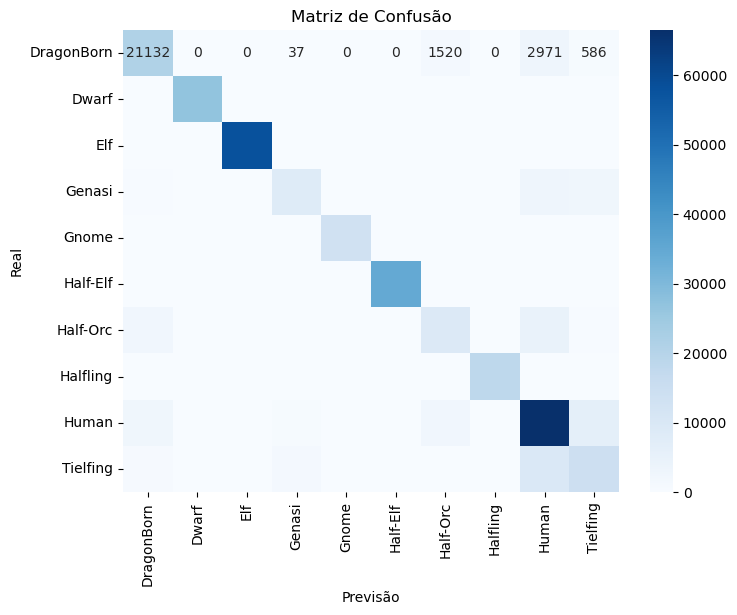

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

# Configurar o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['DragonBorn', 'Dwarf','Elf','Genasi','Gnome','Half-Elf','Half-Orc','Halfling','Human','Tielfing'],
                                                   yticklabels=['DragonBorn', 'Dwarf','Elf','Genasi','Gnome','Half-Elf','Half-Orc','Halfling','Human','Tielfing'])

# Adicionar títulos e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

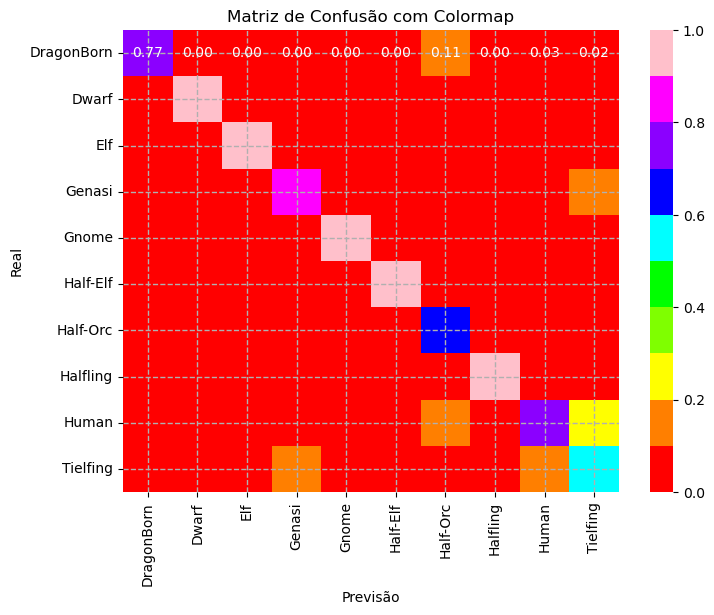

In [31]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#FF0000", "#FF7F00", "#FFFF00", "#7FFF00", "#00FF00", "#00FFFF", "#0000FF", "#8B00FF", "#FF00FF", "#FFC0CB"]  # Vermelho, Laranja, Amarelo, Verde Claro, Verde, Ciano, Azul, Violeta, Magenta, Rosa
n_bins = [10]  # Número de cores
cmap_name = 'my_list'
cm_normalized = cm.astype('float') / cm.sum(axis=0)
# Criar colormap
cm_custom = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins[0])

# Plotar a matriz de confusão normalizada com colormap personalizado
plt.figure(figsize=(8, 6))
ax=sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap=cm_custom,
               xticklabels=['DragonBorn', 'Dwarf','Elf','Genasi','Gnome','Half-Elf','Half-Orc','Halfling','Human','Tielfing'],
               yticklabels=['DragonBorn', 'Dwarf','Elf','Genasi','Gnome','Half-Elf','Half-Orc','Halfling','Human','Tielfing'])
ax.grid(True, which='both', linestyle='--', linewidth=1.0)
# Adicionar títulos e rótulos
plt.title('Matriz de Confusão com Colormap')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

Mapeamento de labels para col1: {
'Dragonborn': 0,
'Dwarf': 1,
'Elf': 2,
'Genasi': 3,
'Gnome': 4,
'Half-Elf': 5,
'Half-Orc': 6,
'Halfling': 7,
'Human': 8,
'Tiefling': 9}

# RandomizedSearchCv

In [57]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[2,3,5,10,15,17,20],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4]
    
}
# Criando o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Realizando a busca aleatória pelos melhores hiperparâmetros
random_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(random_search.best_params_)
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy}")

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Exibindo os resultados do RandomizedSearchCV
results = pd.DataFrame(random_search.cv_results_)
print(results.head())

D:\Steam\Anaconda_2\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Steam\Anaconda_2\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Steam\Anaconda_2\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "D:\Steam\Anaconda_2\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "D:\Steam\Anaconda_2\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
 

Melhores Hiperparâmetros:
{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 15, 'criterion': 'log_loss'}
Accuracy no conjunto de teste: 0.8686787519331644
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     26246
           1       1.00      1.00      1.00     26863
           2       1.00      1.00      1.00     58001
           3       0.87      0.55      0.68     14452
           4       1.00      1.00      1.00     13416
           5       1.00      1.00      1.00     34602
           6       0.72      0.56      0.63     16546
           7       1.00      1.00      1.00     18313
           8       0.77      0.86      0.81     78381
           9       0.61      0.55      0.58     26785

    accuracy                           0.87    313605
   macro avg       0.87      0.84      0.85    313605
weighted avg       0.87      0.87      0.87    313605

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       

# BayesSearchCV

In [58]:
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
param_space = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[2,3,5,10,15,17,20],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[2,3,4]
    
}

# Criando o modelo de regressão com redes neurais
model = DecisionTreeClassifier().fit(X,y)

# Criando o objeto BayesSearchCV
bayes_search = BayesSearchCV(estimator=model, search_spaces = param_space, n_iter =10 , cv =2, verbose=1)

# Realizando a busca bayesiana pelos melhores hiperparâmetros
bayes_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(bayes_search.best_params_)
y_pred = bayes_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy}")

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Melhores Hiperparâmetros:
OrderedDict([('criterion', 'entropy'), ('max_depth', 15), ('min_samples_leaf', 2), ('min_samples_split', 3)])
Accuracy no conjunto de teste: 0.8688190558186253
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     26246
           1       1.00      1.00      1.00     26863
           2       1.00      1.00      1.00     58001
       

# GridSearchCV

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Definindo os hiperparâmetros para ajustar
param_grid = {
              'criterion':['log_loss'],
              'max_depth':[13,14,15,16,17,18,19,20],
              'min_samples_leaf':[2,3],
              'min_samples_split':[2,3]
    
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, verbose=1)


# Realizando a busca em grade pelos melhores hiperparâmetros
grid_search.fit(X_train, y_train)
# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(grid_search.best_params_)
# Melhores parâmetros e score
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor score de acurácia:", grid_search.best_score_)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Melhores Hiperparâmetros:
{'criterion': 'log_loss', 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 3}
Melhores Parâmetros: {'criterion': 'log_loss', 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 3}
Melhor score de acurácia: 0.8681622618315918


In [112]:
racas=['anao_montanha',
        'anao_colina',
        'elfo_alto',
        'elfo_Floresta',
        'humano',
        'meio-elfo',
        'tiefling_infernal',
        'tiefling_abissal',
        'halfling_leves',
        'halfling_robusto',
        'meio_orc',
        'draconato',
        'gnomo_floresta',
        'gnomo_rochas']

races = ['halfling_leves','halfling_robusto']

stats=['forca',
       'constituicao',
       'destreza',
       'sabedoria',
       'inteligencia',
       'carisma',
       'altura',
       'peso']


def rolar_atributos():
    dados=[random.randint(1,6) for i in range(4)]
    dados.sort(reverse=True)
    soma_tres_maiores = sum(dados[:3])
    return soma_tres_maiores

rolar_atributos()+30


38

In [114]:
def ninho_personagens():
    racas = [
    'anao',
    'humano',
    'elfo',
    'meio_elfo',
    'tiefling',
    'halfling',
    'meio_orc',
    'draconato',
    'gnomo'
]

    result={}
    result=pd.DataFrame(result)
    ficha={
            'For':[rolar_atributos()],
            'Des':[rolar_atributos()],
            'Con':[rolar_atributos()],
            'Sab':[rolar_atributos()],
            'Int':[rolar_atributos()],
            'Car':[rolar_atributos()],
            'Raça':[random.choice(racas)]
    }    
    df=pd.DataFrame(ficha)
    if df['Raça'].iloc[0]==('humano'):
        df['For']=df['For']+1
        df['Con']=df['Con']+1
        df['Int']=df['Int']+1
        df['Sab']=df['Sab']+1
        df['Car']=df['Car']+1
        df['Des']=df['Des']+1
        df['Pes'] = [random.uniform(45, 115)]
        df['Alt'] = [random.uniform(1.5, 1.95)]
    if df['Raça'].iloc[0]==('meio_elfo'):
        x=np.random.choice(['For', 'Des', 'Con','Sab','Int'])
        y=np.random.choice(['For', 'Des', 'Con','Sab','Int'])
        while x == y:
            y = np.random.choice(['For', 'Des', 'Con','Sab','Int'])
            df['Car']=df['Car']+2
        df[x]=df[x]+1
        df[y]=df[y]+1
        df['Pes'] = [random.uniform(45, 115)]
        df['Alt'] = [random.uniform(1.5, 1.95)]
    if df['Raça'].iloc[0]==('anao'):
        df['Con']=df['Con']+2
        df['Pes'] = [random.uniform(50, 100)]
        df['Alt'] = [random.uniform(1.35, 1.65)]   
    if df['Raça'].iloc[0]==('elfo'):
        df['Des']=df['Des']+2
        df['Pes'] = [random.uniform(50, 100)]
        df['Alt'] = [random.uniform(1.65, 2.1)]     
    if df['Raça'].iloc[0]==('tiefling'):
        df['Car']=df['Car']+2
        df['Pes'] = [random.uniform(45, 115)]
        df['Alt'] = [random.uniform(1.5, 1.95)]     
    if df['Raça'].iloc[0]==('halfling'):
        df['Des']=df['Des']+2
        df['Pes'] = [random.uniform(10, 25)]
        df['Alt'] = [random.uniform(0.75, 1.1)]  
    if df['Raça'].iloc[0]==('meio_orc'):
        df['For']=df['For']+2
        df['Con']=df['Con']+1
        df['Pes'] = [random.uniform(75, 125)]
        df['Alt'] = [random.uniform(1.6, 2)]
    if df['Raça'].iloc[0]==('draconato'):
        df['For']=df['For']+2
        df['Car']=df['Car']+1
        df['Pes'] = [random.uniform(90, 150)]
        df['Alt'] = [random.uniform(1.75, 2)]     
    if df['Raça'].iloc[0]==('gnomo'):
        df['Int']=df['Int']+2
        df['Pes'] = [random.uniform(10, 30)]
        df['Alt'] = [random.uniform(0.8, 1.35)]

    result = pd.concat([result, df])

    return result

In [116]:
def party(n_linhas):
    result = pd.DataFrame()  # Inicialize o DataFrame final
    for _ in range(n_linhas):
        df = ninho_personagens()
        result = pd.concat([result, df], ignore_index=True)
    return result


In [ ]:
racas = [
    'humano', 'meio_elfo', 'anao_montanha', 'anao_colina', 
    'elfo_alto', 'elfo_floresta', 'tiefling_infernal', 'tiefling_abissal',
    'halfling_leves', 'halfling_robusto', 'meio_orc', 'draconato',
    'gnomo_floresta', 'gnomo_rochas'
]


In [120]:
df_aleatorio = party(10000)
df_aleatorio

,For,Des,Con,Sab,Int,Car,Raça,Pes,Alt
0,12,13,15,14,16,15,meio_orc,104.611910,1.984312
1,15,13,14,17,13,19,meio_elfo,95.568450,1.521998
2,13,19,4,16,6,13,elfo,79.062873,1.748534
3,15,10,16,8,14,10,elfo,66.907377,1.930791
4,12,13,12,11,14,9,anao,93.652912,1.591454
...,...,...,...,...,...,...,...,...,...
9995,15,15,13,14,10,12,elfo,63.240858,1.998104
9996,15,17,14,12,12,16,elfo,59.853601,1.911494
9997,15,17,17,8,15,13,elfo,58.679904,2.062743
9998,18,11,8,7,11,12,meio_elfo,64.461927,1.608300


In [122]:
(1+0.04)/(1+0.02)

1.0196078431372548

In [ ]:
df1['Pes']=df1['Pes']/10
df1['Alt']=df1['Alt']*10

In [ ]:
y=df1['Raça']
X=df1.drop('Raça',axis=1)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

max_depth = 14
min_samples= 5
clf = DecisionTreeClassifier(min_samples_split=min_samples,max_depth=max_depth, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

#Verificação de Acurácia
resultado = clf.score(X_test, y_test)
print ("Acurácia:", resultado)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
print(confusion_matrix(y_test, y_pred))